Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression
- do train/validate/test split
- begin with baselines for classification
- express and explain the intuition and interpretation of Logistic Regression
- use sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression models

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

# Wrangle

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
train = pd.read_csv(DATA_PATH+'titanic/train.csv', index_col='PassengerId')
test = pd.read_csv(DATA_PATH+'titanic/test.csv', index_col='PassengerId')

## EDA

In [3]:
print(train.shape) # <-- This has the target vector
print(test.shape) # <-- This does not

(891, 11)
(418, 10)


In [4]:
train.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [5]:
def wrangle(df):
  df = df.copy()
  df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
  return df

In [6]:
train = wrangle(train)
test = wrangle(test)

In [7]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [8]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

# Split Data

## Split our TV from our FM

In [9]:
target = 'Survived'
y = train[target]
X = train.drop(columns=target)

## Split our training set into training and **validation** sets

We already have a test set. However, since we can only use the test set to assess model performance _after_ we've completed the model, we need data that we can use to _estimate_ test error, data that will allow us to tune our model.

This is an **cross-validation** strategy. We'll discuss other strategies later on.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Establish Baseline

- **Q:** Is this a **regresion** or a **classification** problem?
- **A:** Classification, so our baseline metric is going to be `accuracy_score`.

In [11]:
# What is your majority class?
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.6235955056179775


# Build Our `LinearRegression` Model

Two issues:

- Categorical features that need to be encoded
- Missing values that need to be **imputed**.

In [12]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
model_lin = make_pipeline(
       OneHotEncoder(use_cat_names=True),
       SimpleImputer(),
       StandardScaler(),
       LinearRegression()
)

model_lin.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Question:** How can we access parts of our pipeline? Like if we want to see what our transformed data looks like?

In [14]:
example = make_pipeline(
       OneHotEncoder(use_cat_names=True),
       SimpleImputer(),
       StandardScaler()
)

XT_train = example.fit_transform(X_train)

# Use `named_steps`
col_names = example.named_steps['onehotencoder'].get_feature_names()
pd.DataFrame(XT_train, columns=col_names).head()

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Pclass,Sex_male,Sex_female,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q,Embarked_nan
0,-1.614136,0.724310,-0.724310,1.232263,-0.470722,-0.479342,-0.078684,0.596817,-0.461462,-0.303355,-0.053074
1,-0.400551,0.724310,-0.724310,-0.500482,-0.470722,-0.479342,-0.377145,0.596817,-0.461462,-0.303355,-0.053074
2,0.813034,0.724310,-0.724310,0.192616,-0.470722,-0.479342,-0.474867,0.596817,-0.461462,-0.303355,-0.053074
3,0.813034,0.724310,-0.724310,-0.269449,0.379923,-0.479342,-0.476230,0.596817,-0.461462,-0.303355,-0.053074
4,0.813034,-1.380624,1.380624,-1.809667,2.931860,2.048742,-0.025249,0.596817,-0.461462,-0.303355,-0.053074


# Check `LinearRegression` Metrics

In [16]:
# from sklearn.metrics import accuracy_score

print('Training Accuracy Score:', model_lin.score(X_train, y_train))
print('Validation Accuracy Score:', model_lin.score(X_val, y_val))

Training Accuracy Score: 0.38351734071668986
Validation Accuracy Score: 0.44433715476781926


Why is our `LinearRegression` model so bad?

In [17]:
import matplotlib.pyplot as plt

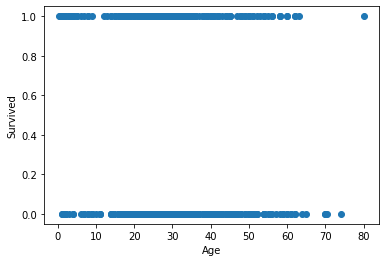

In [18]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived');

# Build Out `LogisticRegression` Model

In [19]:
model_log = make_pipeline(
       OneHotEncoder(use_cat_names=True),
       SimpleImputer(),
       StandardScaler(),
       LogisticRegression()
)

model_log.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Check `LogisiticRegression` Metrics

In [20]:
print('Training Accuracy Score:', model_log.score(X_train, y_train))
print('Validation Accuracy Score:', model_log.score(X_val, y_val))

Training Accuracy Score: 0.8019662921348315
Validation Accuracy Score: 0.8100558659217877


# Make Predictions

In [34]:
# Make predictions
y_pred = model_log.predict(test)

# Put predictions into a DataFrame
submission = pd.DataFrame(y_pred, columns=['Survived'], index=test.index)

# Make a CSV file
submission.to_csv('2020-10-01_submission.csv')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
